# Udemy Course Prediction Using Regression

In [525]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [237]:
df1 = pd.read_csv("/Users/rafisyafrinaldi/Documents/Dibimbing Data Science/final project/datasets/udemy/3.1-data-sheet-udemy-courses-web-development.csv")
df2 = pd.read_csv("/Users/rafisyafrinaldi/Documents/Dibimbing Data Science/final project/datasets/udemy/3.1-data-sheet-udemy-courses-music-courses.csv")
df3 = pd.read_csv("/Users/rafisyafrinaldi/Documents/Dibimbing Data Science/final project/datasets/udemy/3.1-data-sheet-udemy-courses-design-courses.csv")
df4 = pd.read_csv("/Users/rafisyafrinaldi/Documents/Dibimbing Data Science/final project/datasets/udemy/3.1-data-sheet-udemy-courses-business-courses.csv")

In [238]:
df = pd.concat([df1, df2, df3, df4])

In [239]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.820000,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.690000,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.890000,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.780000,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.550000,30.5,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,0.950000,2.5,2017-06-28T21:55:29Z,Business Finance
1188,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,0.360000,1.0,2017-02-08T22:15:56Z,Business Finance
1189,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,0.150000,2.0,2017-06-29T23:20:10Z,Business Finance
1190,1232282.0,The Cash Flow Statement - An Introduction,https://www.udemy.com/cash-flow-statement-intr...,50.0,0.0,0.0,10.0,All Levels,0.180000,1.5,2017-06-28T16:05:51Z,Business Finance


In [240]:
df['year'] = pd.DatetimeIndex(df['published_timestamp']).year

In [241]:
df['month'] = pd.DatetimeIndex(df['published_timestamp']).month

In [242]:
df['YearMonthDate'] = pd.to_datetime(df['published_timestamp']).dt.strftime('%Y-%m-%d')

In [243]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year,month,YearMonthDate
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development,2013.0,2.0,2013-02-14
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development,2013.0,6.0,2013-06-09
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development,2015.0,11.0,2015-11-02
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development,2014.0,4.0,2014-04-08
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development,2016.0,3.0,2016-03-08


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 1191
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
 12  year                 3676 non-null   float64
 13  month                3676 non-null   float64
 14  YearMonthDate        3676 non-null   object 
dtypes: float64(9), object(6)
memory usage:

## Attributes Explained
- course_title: 	The title of the Udemy course. (String)
- url: 	The URL of the Udemy course. (String)
- price: 	The price of the Udemy course (in USD). (Float)
- num_subscribers: 	The number of subscribers for the Udemy course. (Integer)
- num_reviews: 	The number of reviews for the Udemy course. (Integer)
- num_lectures: 	The number of lectures in the Udemy course. (Integer)
- level: 	The level of the Udemy course. (String)
- content_duration: 	The content duration of the Udemy course. (Float)
- published_timestamp: 	The timestamp of when the Udemy course was published. (Datetime)
- subject: 	The subject of the Udemy course. (String)

In [245]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,year,month
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3677.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610889,4.096137,2015.430903,6.162949
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334244,6.054948,1.184876,3.379949
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000,2015.000000,3.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000,2016.000000,6.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000,2016.000000,9.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000,2017.000000,12.000000


In [246]:
df["published_timestamp"] = df["published_timestamp"].apply(pd.to_datetime)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 1191
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3676 non-null   float64            
 1   course_title         3676 non-null   object             
 2   url                  3676 non-null   object             
 3   price                3676 non-null   float64            
 4   num_subscribers      3676 non-null   float64            
 5   num_reviews          3676 non-null   float64            
 6   num_lectures         3676 non-null   float64            
 7   level                3676 non-null   object             
 8   Rating               3677 non-null   float64            
 9   content_duration     3676 non-null   float64            
 10  published_timestamp  3676 non-null   datetime64[ns, UTC]
 11  subject              3677 non-null   object             
 12  year                

Because there are little values that are null, we can skip dropping them.

## Duplicated Values

In [248]:
df.duplicated().value_counts()

False    3679
True        2
dtype: int64

In [249]:
df.duplicated().sum()

2

In [250]:
df = df.drop_duplicates()

In [251]:
df.duplicated().sum()

0

If the price is 0 it means that the course is free.

## Null Valueas

In [252]:
df.isna().sum()

course_id              3
course_title           3
url                    3
price                  3
num_subscribers        3
num_reviews            3
num_lectures           3
level                  3
Rating                 2
content_duration       3
published_timestamp    3
subject                2
year                   3
month                  3
YearMonthDate          3
dtype: int64

With small Null Values, we can just drop it.

In [253]:
df = df.dropna()

In [254]:
df.isna().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
year                   0
month                  0
YearMonthDate          0
dtype: int64

# Data Preparation

In [255]:
df.head(2)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year,month,YearMonthDate
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14 07:03:41+00:00,Subject: Web Development,2013.0,2.0,2013-02-14
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09 15:51:55+00:00,Subject: Web Development,2013.0,6.0,2013-06-09


## Encoding

Encoding 'level' values.

In [256]:
df["level"].unique()

array(['Beginner Level', 'Expert Level', 'All Levels',
       'Intermediate Level'], dtype=object)

Encoding the "level" value.

In [257]:
def level_grouping(x):
    if x == 'Beginner Level':
        return 1
    elif x == 'Expert Level':
        return 3
    elif x == 'All Levels':
        return 4
    elif x == 'Intermediate Level':
        return 2
    else :
        return 0   
    
df['Encoded_level'] = df['level'].apply(level_grouping)


In [258]:
df.head(2)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year,month,YearMonthDate,Encoded_level
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14 07:03:41+00:00,Subject: Web Development,2013.0,2.0,2013-02-14,1
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09 15:51:55+00:00,Subject: Web Development,2013.0,6.0,2013-06-09,3


Renaming 'subject' values

In [259]:
df["subject"].unique()

array(['Subject: Web Development', 'Musical Instruments',
       'Graphic Design', 'Business Finance'], dtype=object)

In [260]:
df['subject'].replace({'Subject: Web Development':'Web Development'} , inplace=True)


In [261]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year,month,YearMonthDate,Encoded_level
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14 07:03:41+00:00,Web Development,2013.0,2.0,2013-02-14,1
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09 15:51:55+00:00,Web Development,2013.0,6.0,2013-06-09,3
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02 21:13:27+00:00,Web Development,2015.0,11.0,2015-11-02,1
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08 16:21:30+00:00,Web Development,2014.0,4.0,2014-04-08,4
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08 22:28:36+00:00,Web Development,2016.0,3.0,2016-03-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413.0,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0.0,0.0,18.0,Beginner Level,0.95,2.0,2016-07-27 21:07:46+00:00,Business Finance,2016.0,7.0,2016-07-27,1
1187,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,0.95,2.5,2017-06-28 21:55:29+00:00,Business Finance,2017.0,6.0,2017-06-28,4
1188,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,0.36,1.0,2017-02-08 22:15:56+00:00,Business Finance,2017.0,2.0,2017-02-08,2
1189,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,0.15,2.0,2017-06-29 23:20:10+00:00,Business Finance,2017.0,6.0,2017-06-29,4


## Bining

In [262]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level'],
      dtype='object')

In [263]:
df['price'].describe()

count    3676.000000
mean       66.115343
std        61.056073
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [264]:
def price_cat(x):
    if x == 0:
        return 'Free'
    elif x <= 20:
        return 'Cheap'
    elif x > 20 and x <= 45:
        return 'Mid-priced'
    elif x > 45:
        return 'Expensive'
df['Cat_price'] = df['price'].apply(price_cat)

In [265]:
df[['price', 'Cat_price']].head()

,price,Cat_price
0,0.0,Free
1,0.0,Free
2,200.0,Expensive
3,0.0,Free
4,200.0,Expensive


In [266]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level', 'Cat_price'],
      dtype='object')

In [267]:
df["subject"].unique()

array(['Web Development', 'Musical Instruments', 'Graphic Design',
       'Business Finance'], dtype=object)

Encoding subject

In [268]:
def subject_grouping(x):
    if x == 'Web Development':
        return 1
    elif x == 'Musical Instruments':
        return 2
    elif x == 'Graphic Design':
        return 3
    elif x == 'Business Finance':
        return 4 
    
df['Encoded_subject'] = df['subject'].apply(subject_grouping)


In [269]:
df[df['Encoded_subject']==1]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year,month,YearMonthDate,Encoded_level,Cat_price,Encoded_subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14 07:03:41+00:00,Web Development,2013.0,2.0,2013-02-14,1,Free,1
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09 15:51:55+00:00,Web Development,2013.0,6.0,2013-06-09,3,Free,1
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02 21:13:27+00:00,Web Development,2015.0,11.0,2015-11-02,1,Expensive,1
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08 16:21:30+00:00,Web Development,2014.0,4.0,2014-04-08,4,Free,1
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08 22:28:36+00:00,Web Development,2016.0,3.0,2016-03-08,1,Expensive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1227578.0,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29 17:56:24+00:00,Web Development,2017.0,5.0,2017-05-29,1,Expensive,1
1201,1277924.0,Angular 4 Front To Back,https://www.udemy.com/angular-4-front-to-back/,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06 15:04:55+00:00,Web Development,2017.0,7.0,2017-07-06,4,Mid-priced,1
1202,1248172.0,Essentials of Spring 5.0 for Developers,https://www.udemy.com/essentials-of-spring-50-...,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11 18:34:40+00:00,Web Development,2017.0,6.0,2017-06-11,1,Expensive,1
1203,1250934.0,Display and analyze GIS data on the web with L...,https://www.udemy.com/display-and-analyze-gis-...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15 21:17:43+00:00,Web Development,2017.0,6.0,2017-06-15,1,Expensive,1


# EDA

## Searching for outliers

In [270]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level', 'Cat_price', 'Encoded_subject'],
      dtype='object')

In [271]:
numericals = ['price', 'num_subscribers', 'num_reviews', 'num_lectures','Encoded_level', 'Rating','content_duration', 'year', 'Encoded_level','Encoded_subject']

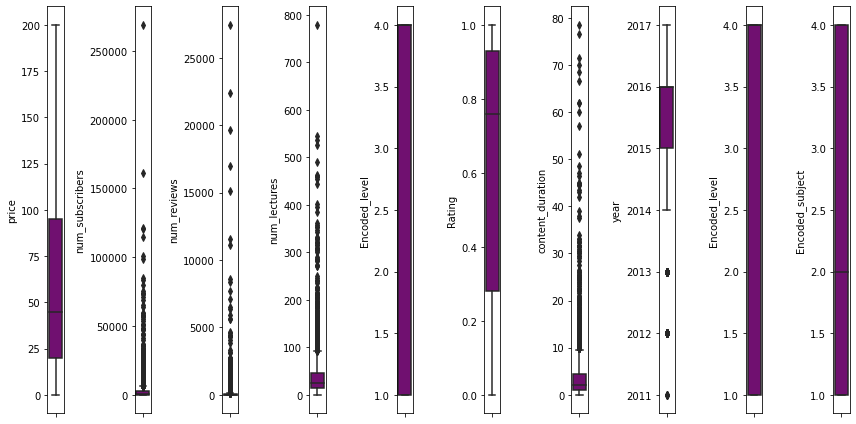

In [272]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y = df[features[i]], color='purple')
    plt.tight_layout()

The attributes that are safe from outliers are 'price', and 'Rating'.
The attributes that have outliers make sense as in the data can exist.

In [273]:
df6 = df[numericals].copy()

In [274]:
def check_outliers_percentage(df):
    # Create an empty dictionary to store the results
    outliers_percentage = {}

    # Loop through the columns in the dataframe
    for col in df.columns:
        # Calculate the first and third quartiles of the data
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        # Calculate the IQR
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Count the number of outliers in the column
        count = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)].count()

        # Calculate the percentage of outliers in the column
        percentage = (count / df[col].count())*100

        # Add the percentage to the dictionary
        outliers_percentage[col] = percentage

    # Return the dictionary with the results
    return outliers_percentage

In [275]:
check_outliers_percentage(df6)

{'price': 0.0,
 'num_subscribers': 11.806311207834602,
 'num_reviews': 13.438520130576714,
 'num_lectures': 7.9162132752992385,
 'Encoded_level': Encoded_level    0.0
 Encoded_level    0.0
 dtype: float64,
 'Rating': 0.0,
 'content_duration': 8.51468988030468,
 'year': 6.828073993471165,
 'Encoded_subject': 0.0}

In [276]:
def replace_outliers_median(df):
    # Create a new dataframe to store the results
    df_clean = df.copy()

    # Loop through the columns in the dataframe
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        whisker_width = 1.5
        lower_whisker = Q1 -(whisker_width*IQR)
        upper_whisker = Q3 + (whisker_width*IQR)

        # Count the number of outliers in the column
        df_clean[col]= np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

    # Return the cleaned dataframe
    return df_clean

In [277]:
df_clean = replace_outliers_median(df6)

In [278]:
check_outliers_percentage(df_clean)

{'price': 0.0,
 'num_subscribers': 0.0,
 'num_reviews': 0.0,
 'num_lectures': 0.0,
 'Encoded_level': Encoded_level    0.0
 Encoded_level    0.0
 dtype: float64,
 'Rating': 0.0,
 'content_duration': 0.0,
 'year': 0.0,
 'Encoded_subject': 0.0}

The outliers have been dealt.

## Distribution Form 

/Users/rafisyafrinaldi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rafisyafrinaldi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rafisyafrinaldi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

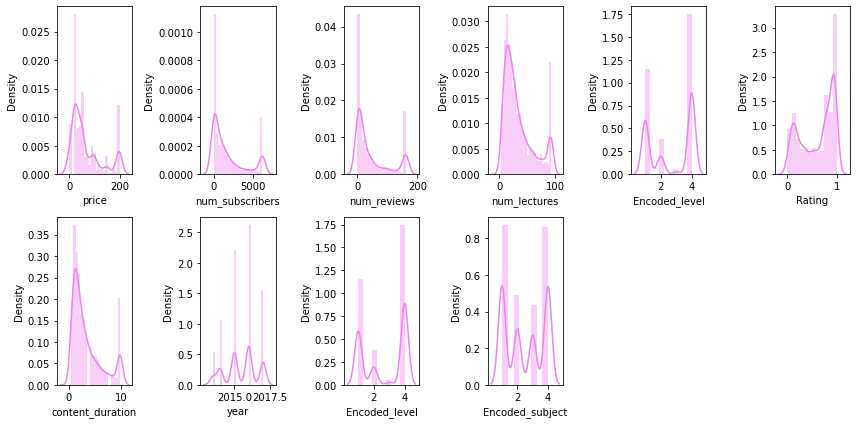

In [279]:
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_clean[features[i]], color='violet')
    plt.xlabel(features[i])
    plt.tight_layout()

The distribution form of all attributes is not symmetrical the possible cause of this is the not handled outliers. Because the values that are outliers are many so it's safe to make the skewness handled with alternative ways to keep the origanility of the data.

## Min Max Scaler

## Standardization

In [280]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_clean[['price']])

df_clean['Standardized_price'] = scaler.transform(df_clean[['price']])

In [281]:
df_clean[['price', 'Standardized_price']].describe()

,price,Standardized_price
count,3676.000000,3.676000e+03
mean,66.115343,1.591461e-15
std,61.056073,1.000136e+00
min,0.000000,-1.083010e+00
25%,20.000000,-7.553977e-01
50%,45.000000,-3.458823e-01
75%,95.000000,4.731485e-01
max,200.000000,2.193113e+00


/Users/rafisyafrinaldi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

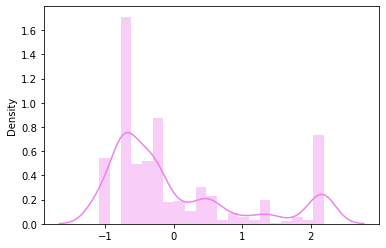

In [282]:
sns.distplot(x=df_clean['Standardized_price'], color='violet')

## Log Transformation

In [283]:
df_clean[df_clean > 0]

,price,num_subscribers,num_reviews,num_lectures,Encoded_level,Rating,content_duration,year,Encoded_level,Encoded_subject,Standardized_price
0,NaN,6227.0,161.5,45.0,1.0,0.82,9.75,2013.5,1.0,1.0,NaN
1,NaN,6227.0,161.5,27.0,3.0,0.69,3.50,2013.5,3.0,1.0,NaN
2,200.0,6227.0,161.5,92.5,1.0,0.89,9.75,2015.0,1.0,1.0,2.193113
3,NaN,6227.0,161.5,30.0,4.0,0.78,3.00,2014.0,4.0,1.0,NaN
4,200.0,6227.0,161.5,92.5,1.0,0.55,9.75,2016.0,1.0,1.0,2.193113
...,...,...,...,...,...,...,...,...,...,...,...
1186,40.0,NaN,NaN,18.0,1.0,0.95,2.00,2016.0,1.0,4.0,NaN
1187,75.0,NaN,NaN,9.0,4.0,0.95,2.50,2017.0,4.0,4.0,0.145536
1188,90.0,NaN,NaN,12.0,2.0,0.36,1.00,2017.0,2.0,4.0,0.391245
1189,50.0,NaN,NaN,9.0,4.0,0.15,2.00,2017.0,4.0,4.0,NaN


In [284]:
df_clean.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'Encoded_level', 'Rating', 'content_duration', 'year', 'Encoded_level',
       'Encoded_subject', 'Standardized_price'],
      dtype='object')

In [313]:
df_clean1 = df_clean.copy()

In [314]:
df_clean1.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'Encoded_level', 'Rating', 'content_duration', 'year', 'Encoded_level',
       'Encoded_subject', 'Standardized_price', 'log_subscribers',
       'log_reviews', 'log_lectures'],
      dtype='object')

In [307]:
numericals3 =['Standardized_price','num_subscribers', 'num_reviews', 'num_lectures',
       'Encoded_level', 'Rating', 'content_duration', 'year',
       'Encoded_subject']

In [373]:
#log transforming the columns
df_clean['log_subscribers'] = df_clean['num_subscribers'].apply(np.log1p)
df_clean['log_reviews'] = df_clean['num_reviews'].apply(np.log1p)
df_clean['log_lectures'] = df_clean['num_lectures'].apply(np.log1p)
df_clean['log_rating'] = df_clean['Rating'].apply(np.log1p)
df_clean['log_content'] = df_clean['content_duration'].apply(np.log1p)

In [317]:
df_clean.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'Encoded_level', 'Rating', 'content_duration', 'year', 'Encoded_level',
       'Encoded_subject', 'Standardized_price', 'log_subscribers',
       'log_reviews', 'log_lectures', 'log_rating'],
      dtype='object')

/Users/rafisyafrinaldi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rafisyafrinaldi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rafisyafrinaldi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

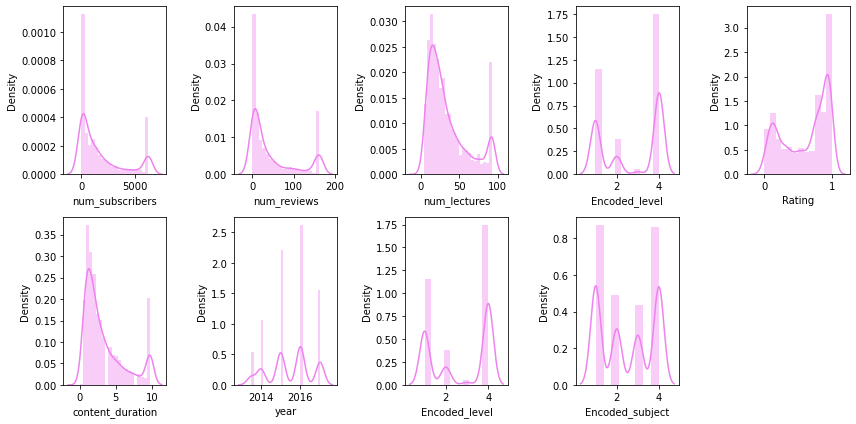

In [318]:
plt.figure(figsize=(12,6))

features = numericals3
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_clean[features[i]], color='violet')
    plt.xlabel(features[i])
    plt.tight_layout()

In [319]:
check_outliers_percentage(df_clean)

{'price': 0.0,
 'num_subscribers': 0.0,
 'num_reviews': 0.0,
 'num_lectures': 0.0,
 'Encoded_level': Encoded_level    0.0
 Encoded_level    0.0
 dtype: float64,
 'Rating': 0.0,
 'content_duration': 0.0,
 'year': 0.0,
 'Encoded_subject': 0.0,
 'Standardized_price': 0.0,
 'log_subscribers': 1.7682263329706203,
 'log_reviews': 0.0,
 'log_lectures': 0.02720348204570185,
 'log_rating': 0.0}

## Bivariate Analysis

In [342]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level', 'Cat_price', 'Encoded_subject'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Encoded_level'>

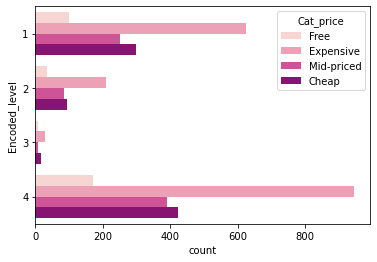

In [343]:
sns.countplot(data = df, hue ='Cat_price', y = 'Encoded_level', palette = 'RdPu')

The graph displays us that the most course in each level are expensive courses, and the free ones are the least one.

<AxesSubplot:xlabel='count', ylabel='subject'>

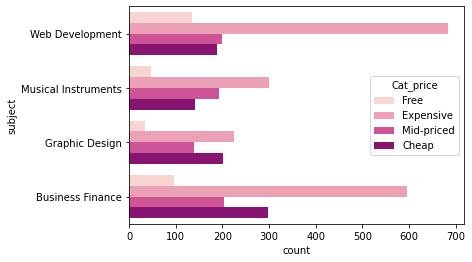

In [344]:
sns.countplot(data = df, hue ='Cat_price', y = 'subject', palette = 'RdPu')

The graph shows us that almost every subject the expensive ones are the most.

<AxesSubplot:xlabel='content_duration', ylabel='subject'>

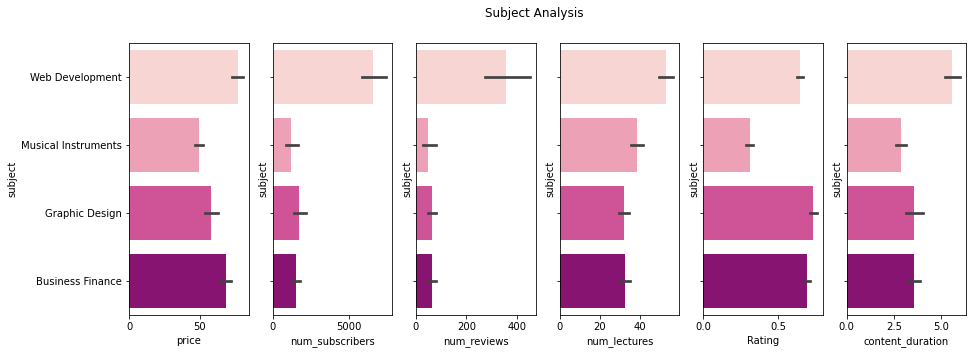

In [345]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5), sharey=True)
fig.suptitle('Subject Analysis')

sns.barplot(data= df, ax=axes[0],  y = 'subject', x = 'price', palette = 'RdPu')

sns.barplot(data= df, ax=axes[1],  y = 'subject', x = 'num_subscribers', palette = 'RdPu')

sns.barplot(data= df, ax=axes[2],  y = 'subject', x = 'num_reviews', palette = 'RdPu')

sns.barplot(data= df, ax=axes[3],  y = 'subject', x = 'num_lectures', palette = 'RdPu')

sns.barplot(data= df, ax=axes[4],  y = 'subject', x = 'Rating', palette = 'RdPu')

sns.barplot(data= df, ax=axes[5],  y = 'subject', x = 'content_duration', palette = 'RdPu')

- From this subplots we learn that `Web Development` dominates almost every category, and the opposite of it is the subject of `Musical Instruments`.
- The number of `Rating` is not determined from the most number of the course's `num_subscribers`.
- Even though `Musical Instruments` course placed the least in almost category but it offers the second most amount of `num_lectures`
- `Web Development` course can be considered as success because of how it placed in every category, so we can deduce that to be a great course it must increase almost each value in every category.

In [518]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level', 'Cat_price', 'Encoded_subject', 'tmp'],
      dtype='object')

In [529]:
#Total Subscribers by Year
sns.set_style("whitegrid")
new_df=pd.DataFrame(df.groupby(df['published_timestamp'].dt.year)['num_subscribers'].sum())
new_df=new_df.reset_index()

line = px.line(new_df, x="published_timestamp", y="num_subscribers", text="num_subscribers",title='Subscriber Change By Year'
               ,labels={"published_timestamp":"Year","num_subscribers":"Total Subscribers"}
               ,color_discrete_sequence=['violet'])
line.update_traces(textposition="top center")
line.update_layout(font_color='purple')

The graph shows us that almost the peak clients on Udemy is in 2015.

In [535]:
fig=px.violin(x=df['subject'],y=df['content_duration'],color=df['Cat_price'],
          color_discrete_map={True: "RebeccaPurple", False: "MediumPurple"},template="plotly_white")
fig.update_layout(legend_title_text='Paid')
fig.update_traces(hovertemplate='Subject: %{x} <br>Content Duration: %{y}')
fig.update_yaxes( title='Content Duration')
fig.update_xaxes( title='Subjects')


- Free Courses have less content duration
- Courses from Musical instruments have less content duration
- Course with maximum content duration is from web development
- Average content duration is 2 for all subjects except web development(3.5)


In [547]:
fig=px.violin(x=df['subject'],y=df['num_lectures'],color=df['Cat_price'],
          color_discrete_map={True: "RebeccaPurple", False: "MediumPurple"},template="plotly_white")
fig.update_layout(legend_title_text='Paid')
fig.update_traces(hovertemplate='Subject: %{x} <br>Content Duration: %{y}')
fig.update_yaxes( title='Number Of Lectures')
fig.update_xaxes( title='Subjects')

- Expensive Courses have the most contentor lectures
- Courses from Grapphic Design have the last contents
- Course with the most content is from web development

In [545]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


(-0.5, 399.5, 199.5, -0.5)

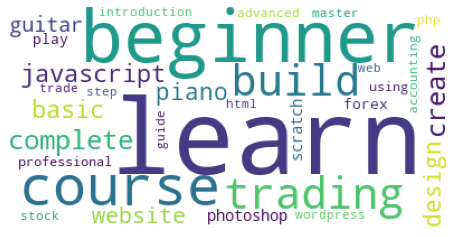

In [549]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through course title 
for val in df.course_title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the string
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud=WordCloud(
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8,10) ,facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

These are the key words that are most common in `course_title`

<AxesSubplot:>

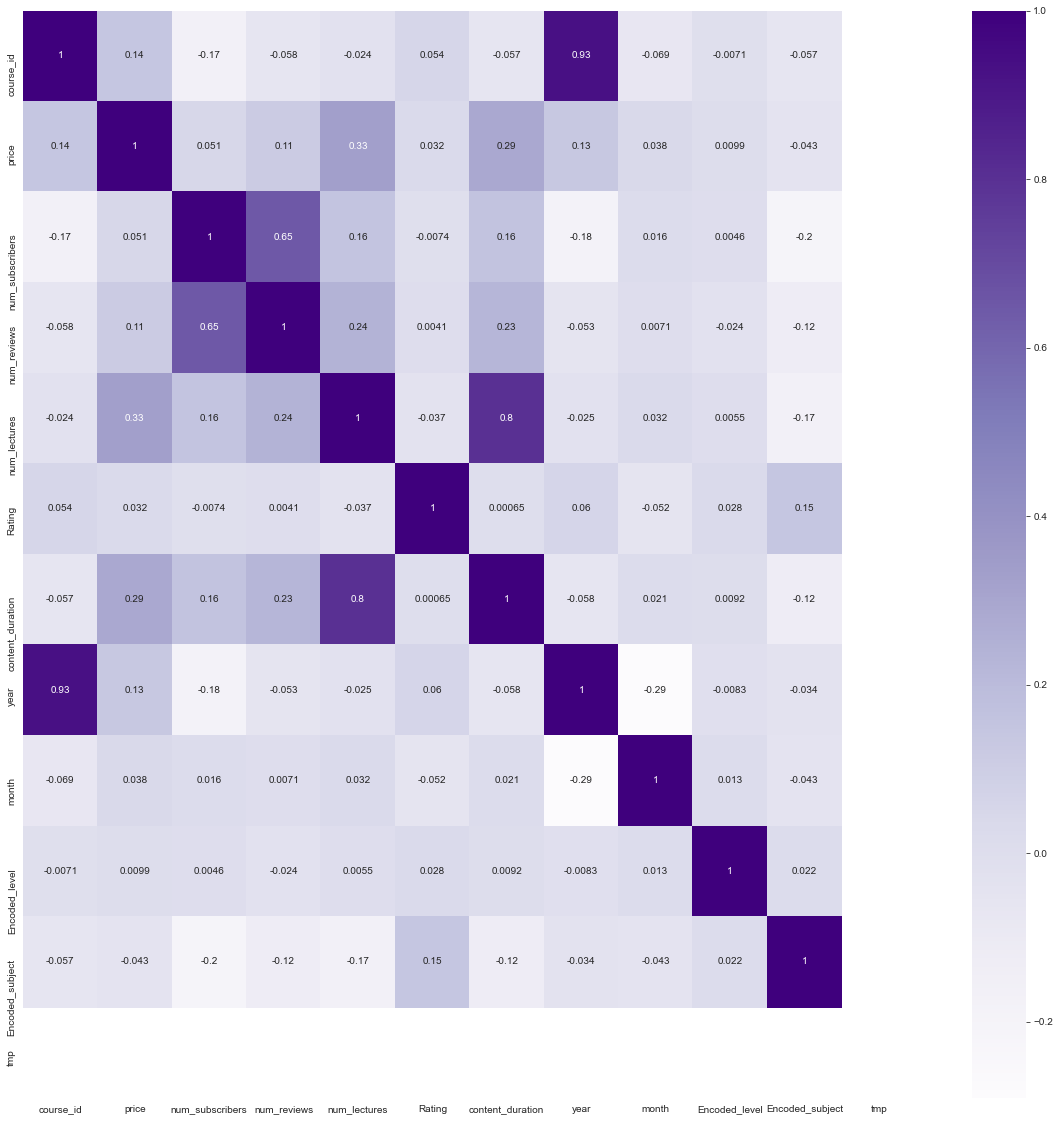

In [552]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='Purples',annot=True)

Corelation Map

In [557]:
import plotly.graph_objs as go
index_vals = df['level'].astype('category').cat.codes
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='price',
                                 values=df['price']),
                            dict(label='num_subscribers',
                                 values=df['num_subscribers']),
                            dict(label='num_reviews',
                                 values=df['num_reviews']),
                            dict(label='num_lectures',
                                 values=df['num_lectures']),
                           dict(label='content_duration',
                                 values=df['content_duration'])],
                showupperhalf=False, 
                text=df['level'],
                marker=dict(color=index_vals,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))

fig.update_layout(
    title='UDEMY Courses',
    width=1000,
    height=1000,
)

fig.show()

- There is positive but not so strong relationship between number of reviews and number of subscribers
- Also there is positive and almost strong (.80) relationship between number of lectures in the course and the duration of the course.

In [569]:
top_10_paid_courses = df[df['price']!=0][['course_title','year','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(10)


fig = px.bar(top_10_paid_courses, y= 'num_subscribers', x='course_title', hover_data = top_10_paid_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

fig = px.pie(top_10_paid_courses, values='num_subscribers', names='course_title')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()


- Almost all of the top 10 paid courses are from Web Development area.

In [346]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level', 'Cat_price', 'Encoded_subject'],
      dtype='object')

In [347]:
Yearly_data2 = (df
                .groupby('year')
                .agg(price=('price', 'sum'),subscribers =('num_subscribers', 'sum'), 
                     reviews =('num_reviews', 'sum'), lectures =('num_lectures', 'sum'), 
                     content_duration =('content_duration', 'sum'), course =('course_id', 'nunique') )
                .reset_index())

Yearly_data2['year'] = Yearly_data2['year'].astype(str) 
Yearly_data2

,year,price,subscribers,reviews,lectures,content_duration,course
0,2011.0,310.0,119028.0,4041.0,574.0,51.000000,5
1,2012.0,1835.0,555339.0,10272.0,2374.0,278.833333,45
2,2013.0,10785.0,1680153.0,48060.0,7237.0,1006.200000,201
3,2014.0,23800.0,1952599.0,86929.0,19305.0,2191.516667,490
4,2015.0,67830.0,3475324.0,196810.0,41930.0,3890.600000,1014
5,2016.0,84260.0,2977814.0,195464.0,50843.0,5086.866667,1204
6,2017.0,54220.0,1000226.0,33019.0,25254.0,2552.383333,713


<AxesSubplot:xlabel='year', ylabel='course'>

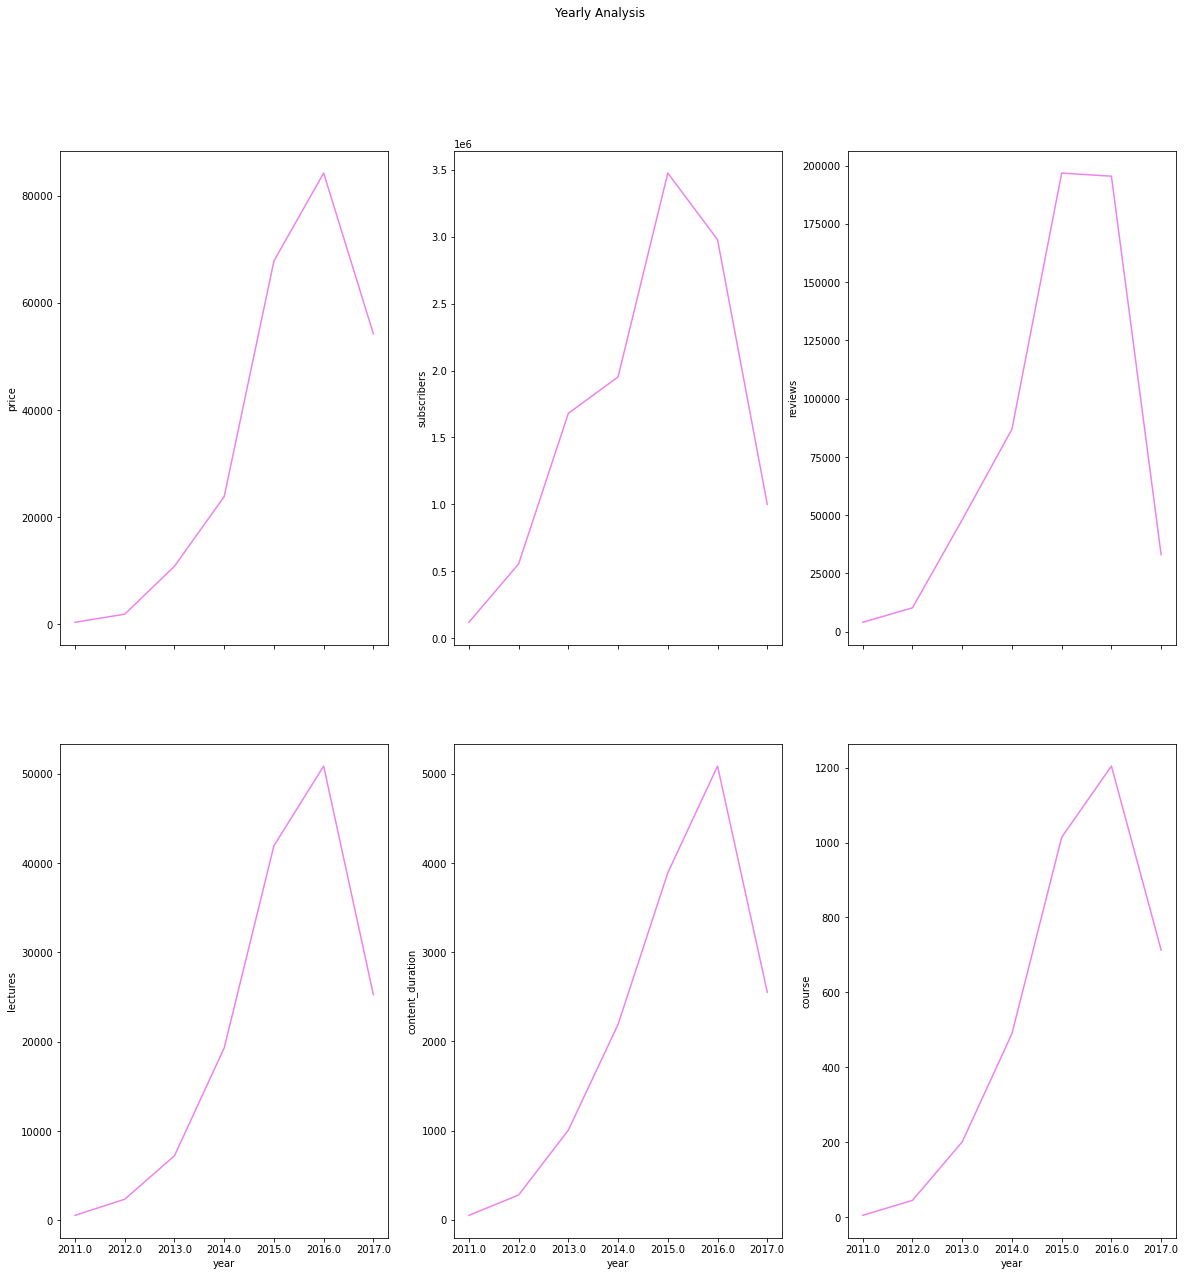

In [348]:
fig, axes = plt.subplots(2, 3, figsize=(20,20), sharex=True)
fig.suptitle('Yearly Analysis')

sns.lineplot(data= Yearly_data2, ax=axes[0,0],  y = 'price', x = 'year', color = 'violet')

sns.lineplot(data= Yearly_data2, ax=axes[0,1],  y = 'subscribers', x = 'year', color = 'violet')

sns.lineplot(data= Yearly_data2, ax=axes[0,2],  y = 'reviews', x = 'year', color = 'violet')

sns.lineplot(data= Yearly_data2, ax=axes[1,0],  y = 'lectures', x = 'year', color = 'violet')

sns.lineplot(data= Yearly_data2, ax=axes[1,1],  y = 'content_duration', x = 'year', color = 'violet')

sns.lineplot(data= Yearly_data2, ax=axes[1,2],  y = 'course', x = 'year', color = 'violet')


- The Graph shows that almost every attribute records a decrement from 2016 to 2017
- Almost every attributes show the same fluctuation throug the years.
- The peak year of Udemy is at the year 2016 seen from 

In [512]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level', 'Cat_price', 'Encoded_subject'],
      dtype='object')

In [573]:
df['tmp'] = 1
fig = px.pie(df, names='subject',values='tmp',hole = 0.6,title='relation tips')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title_text="Subject percentage",
    annotations=[dict(text='course subjects', x=0.5, y=0.5, font_size=20, showarrow=False)])

In [577]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject', 'year', 'month', 'YearMonthDate',
       'Encoded_level', 'Cat_price', 'Encoded_subject', 'tmp'],
      dtype='object')

In [584]:
top_10 = df[['course_title','year','subject','num_subscribers', 'price', 'Rating', 'content_duration', 'level']].sort_values(by=['price','num_subscribers','Rating', 'content_duration', 'level'], ascending=False).head(15)

top_10.reset_index()

,index,course_title,year,subject,num_subscribers,price,Rating,content_duration,level
0,2,The Web Developer Bootcamp,2015.0,Web Development,121584.0,200.0,0.89,43.0,Beginner Level
1,4,The Complete Web Developer Course 2.0,2016.0,Web Development,114512.0,200.0,0.55,30.5,Beginner Level
2,1,Pianoforall - Incredible New Way To Learn Pian...,2014.0,Musical Instruments,75499.0,200.0,0.96,30.0,Beginner Level
3,3,Photoshop for Entrepreneurs - Design 11 Practi...,2016.0,Graphic Design,36288.0,200.0,0.96,5.0,All Levels
4,32,Ultimate Web Designer & Developer Course: Buil...,2015.0,Web Development,33788.0,200.0,0.31,32.5,Beginner Level
5,41,PHP for Beginners -Become a PHP Master - Proje...,2015.0,Web Development,28880.0,200.0,0.40,30.5,Beginner Level
6,53,The Ultimate Web Developer How To Guide,2015.0,Web Development,24861.0,200.0,0.85,22.5,Beginner Level
7,7,How To Make Graphics For A Website,2014.0,Graphic Design,24857.0,200.0,0.89,1.5,All Levels
8,59,1 Hour JavaScript,2013.0,Web Development,22999.0,200.0,0.24,1.0,All Levels
9,64,Become A Web Developer And Seller - Build Webs...,2013.0,Web Development,21730.0,200.0,0.36,2.5,All Levels


In [587]:
top_10.describe()

,year,num_subscribers,price,Rating,content_duration
count,15.000000,15.000000,15.0,15.000000,15.000000
mean,2014.533333,40029.200000,200.0,0.592667,18.266667
std,1.060099,34770.309118,0.0,0.287190,15.906947
min,2013.000000,17071.000000,200.0,0.210000,1.000000
25%,2014.000000,20948.000000,200.0,0.335000,3.000000
50%,2015.000000,24857.000000,200.0,0.550000,16.000000
75%,2015.000000,35038.000000,200.0,0.870000,30.500000
max,2016.000000,121584.000000,200.0,0.960000,44.500000


# Business Insights:

- Most Of The Courses Is Paid
- Most Of The Courses are All Levels , Need More From Expert Level
- Most Of Students care about Buisiness Finance & Web Development
- Course Price Does Not Affect Subscribers
- Price Does Not Affect Reviews
- Price Does Not Affect Course Duration
- Probaly course time affect course subscribers
- More Subscribers leads to more reviews



## Business Recommendations:
So, in order to have an ideal course on Udemy It would be:
- Under `Web Development`
- priced between 175-200USD
- tagged as all levels
- Content Duration between 15-18 hours long
- Put popular keywords in the title

# Modeling

In [374]:
df_clean.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'Encoded_level', 'Rating', 'content_duration', 'year', 'Encoded_level',
       'Encoded_subject', 'Standardized_price', 'log_subscribers',
       'log_reviews', 'log_lectures', 'log_rating', 'log_content'],
      dtype='object')

In [377]:
df_model = df_clean[['Standardized_price', 'log_subscribers',
       'log_reviews', 'log_lectures', 'log_rating', 'log_content',  'year', 'Encoded_level',
       'Encoded_subject']].copy()

In [380]:
print(type(df_model))

<class 'pandas.core.frame.DataFrame'>


In [383]:
df_model.columns

Index(['Standardized_price', 'log_subscribers', 'log_reviews', 'log_lectures',
       'log_rating', 'log_content', 'year', 'Encoded_subject'],
      dtype='object')

In [466]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Standardized_price  3676 non-null   float64
 1   log_subscribers     3676 non-null   float64
 2   log_reviews         3676 non-null   float64
 3   log_lectures        3676 non-null   float64
 4   log_rating          3676 non-null   float64
 5   log_content         3676 non-null   float64
 6   year                3676 non-null   float64
 7   Encoded_subject     3676 non-null   float64
dtypes: float64(8)
memory usage: 323.0 KB


Although the process to decrease the skewness has been done, the distribution of each attributes are not exactly changing.
However, the correlation is seen between `num_review` and `num_subscribers`

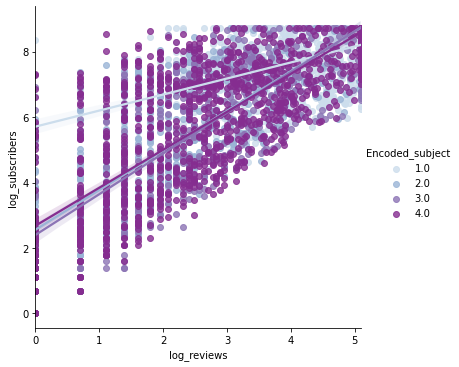

In [467]:
sns.lmplot(data = df_model, x = 'log_reviews', y = 'log_subscribers', hue = 'Encoded_subject',palette = 'BuPu' )

<AxesSubplot:>

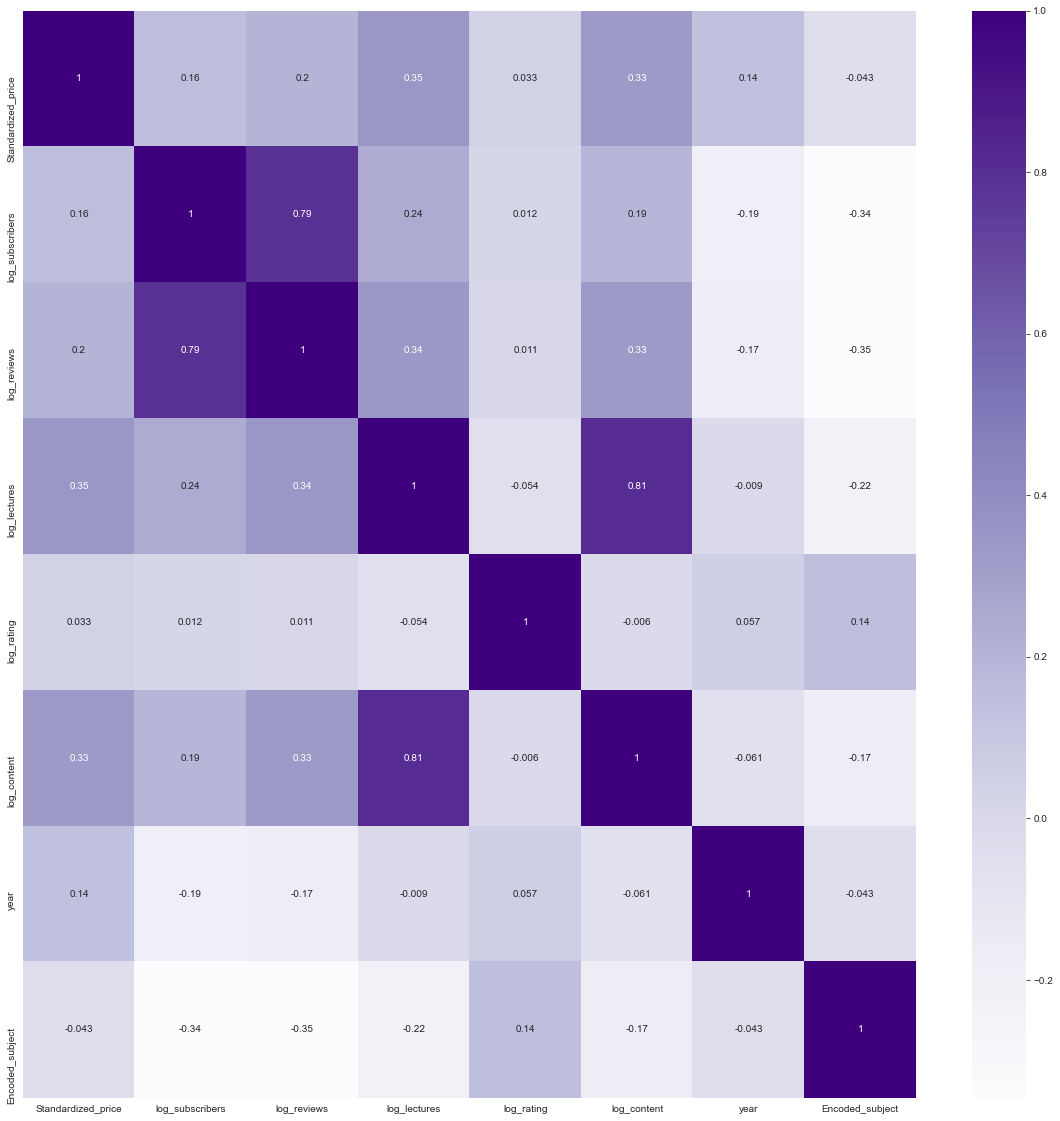

In [554]:
plt.figure(figsize=(20,20))
correlation = df_model.corr()
sns.heatmap(correlation, annot=True, cmap='Purples')

## Simple Regression

In [469]:
df4 = df_model.copy()

In [474]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Standardized_price  3676 non-null   float64
 1   log_subscribers     3676 non-null   float64
 2   log_reviews         3676 non-null   float64
 3   log_lectures        3676 non-null   float64
 4   log_rating          3676 non-null   float64
 5   log_content         3676 non-null   float64
 6   year                3676 non-null   float64
 7   Encoded_subject     3676 non-null   float64
dtypes: float64(8)
memory usage: 323.0 KB


In [475]:
df_model.columns

Index(['Standardized_price', 'log_subscribers', 'log_reviews', 'log_lectures',
       'log_rating', 'log_content', 'year', 'Encoded_subject'],
      dtype='object')

In [477]:
from sklearn.model_selection import train_test_split

feature = df4.drop(columns='Standardized_price')
target = df4[['Standardized_price']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [478]:
from sklearn.linear_model import LinearRegression

# define the model
simple_reg = LinearRegression()

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train,))

simple_reg.fit(X_df_train, y_df_train)

LinearRegression()

In [479]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_df_train
model = simple_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-336.096257
1,log_subscribers,0.021794
2,log_reviews,0.067830
3,log_lectures,0.289300
4,log_rating,0.090615
5,log_content,0.251647
6,year,0.165864
7,Encoded_subject,0.060942


In [480]:
# calculate residuals
y_predict_train = simple_reg.predict(X_df_train)
residual = y_df_train - y_predict_train

In [481]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,log_subscribers,2.770396
2,log_reviews,2.936328
3,log_lectures,2.967027
4,log_rating,1.035437
5,log_content,2.930775
6,year,1.066273
7,Encoded_subject,1.187346


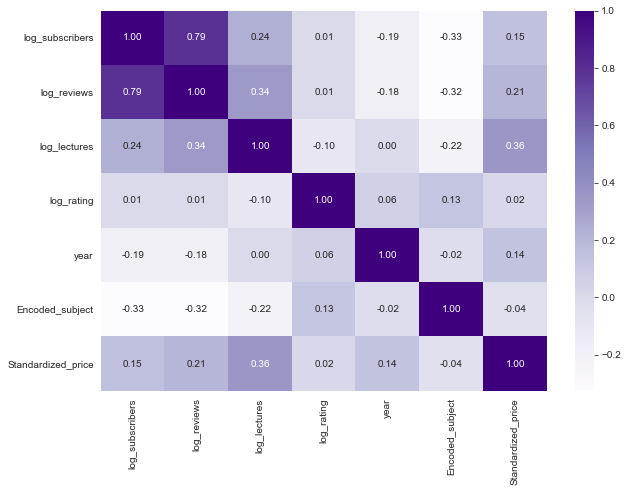

In [553]:
admit_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap ='Purples',fmt='.2f')
plt.show()

In [455]:
feature_df4_train.columns

Index(['log_subscribers', 'log_reviews', 'log_lectures', 'log_rating',
       'log_content', 'year', 'Encoded_subject'],
      dtype='object')

In [483]:
feature_df_train = feature_df_train.drop(columns=['log_content']) 
feature_df_test = feature_df_test.drop(columns=['log_content'])

In [484]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,log_subscribers,2.721547
2,log_reviews,2.868118
3,log_lectures,1.149670
4,log_rating,1.032231
5,year,1.056726
6,Encoded_subject,1.186814


VIF score of 1.042820 is not considered very high, and in some cases it may be acceptable.

In [485]:
from sklearn.linear_model import LinearRegression

# define the model
simple_reg = LinearRegression()

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train,))

simple_reg.fit(X_df_train, y_df_train)

LinearRegression()

In [486]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_df_train
model = simple_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-320.844112
1,log_subscribers,0.013424
2,log_reviews,0.082105
3,log_lectures,0.446293
4,log_rating,0.111882
5,year,0.158197
6,Encoded_subject,0.062513


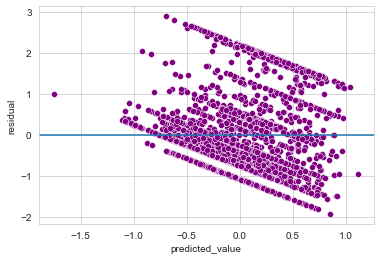

In [558]:
# calculate residuals
y_predict_train = simple_reg.predict(X_df_train)
residual = y_df_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual", color='purple')
plt.axhline(0)
plt.show()


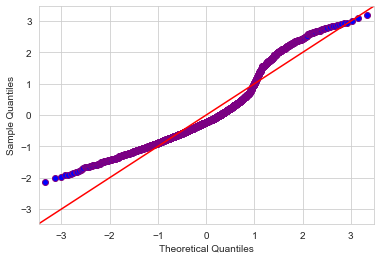

In [559]:
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45', color = 'purple')
plt.show()

In [489]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))

R-squared for training data is 0.1661078036548198
RMSE for training data is 0.9129156921648529


In [490]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = simple_reg.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [491]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))

RMSE for testing data is 0.9199733549765127


## Lasso

In [494]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1, 
                  random_state=42)

lasso_reg.fit(X_df_train, y_df_train)

Lasso(alpha=0.1, random_state=42)

In [495]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_df_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-121.164715
1,log_subscribers,0.003609
2,log_reviews,0.052668
3,log_lectures,0.258377
4,log_rating,0.000000
5,year,0.059605
6,Encoded_subject,0.000000


## Ridge Regression

In [497]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg = Ridge(alpha=0.1, 
                  random_state=42)

ridge_reg.fit(X_df_train, y_df_train)

Ridge(alpha=0.1, random_state=42)

In [498]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_df_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,-320.837993
1,log_subscribers,0.013424
2,log_reviews,0.082108
3,log_lectures,0.446259
4,log_rating,0.111802
5,year,0.158194
6,Encoded_subject,0.062511


## Split data: train-validation-test

In [500]:
# split train test
from sklearn.model_selection import train_test_split

feature = df4.drop(columns='Standardized_price')
target = df4[['Standardized_price']]

# First splitting: pretrain and test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

In [501]:
feature_df_train = feature_df_train.drop(columns=['log_content'])
feature_df_validation = feature_df_validation.drop(columns=['log_content'])
feature_df_test = feature_df_test.drop(columns=['log_content'])

## Train Multiple Models
with different alpha (lambda)

In [502]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha)
Based on validation set

In [503]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.9391039698885767
RMSE of Ridge regression model with alpha = 0.1 is 0.9391035949477503
RMSE of Ridge regression model with alpha = 1.0 is 0.9390999723893716
RMSE of Ridge regression model with alpha = 10 is 0.9390753145419762


The best model is RMSE of Ridge regression model with alpha = 10 which is the smallest

In [504]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-307.870739
1,log_subscribers,0.008199
2,log_reviews,0.087175
3,log_lectures,0.441011
4,log_rating,0.119606
5,year,0.151768
6,Encoded_subject,0.065093


## Train Multiple Models
Lasso

In [505]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=42)

In [506]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 0.9394422769306918
RMSE of Lasso regression model with alpha = 0.1 is 0.9595219927724856
RMSE of Lasso regression model with alpha = 1.0 is 1.0230308818546954
RMSE of Lasso regression model with alpha = 10 is 1.0230308818546954


The best model is RMSE of Lasso regression model with alpha = 0.01 which is the smallest

## Training Error

In [507]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

In [508]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 0.9064133222305405
MAE for training data is 0.6991078726347728
MAPE for training data is 1.1430941009191986


*   MAE = On average, our prediction
deviates the true
price by 0.69
*   MAPE = With 1.14 is considered Good to forecast, and this 0.69 is equivalent to 1.14 deviation relative to the standardized price



In [588]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_df_test, y_df_test)
mean_absolute_percentage_error(y_df_test, y_predict_test)

1.223617267012635

## Testing Error

In [510]:
# prepare prediction result on test data
lasso_best = lasso_reg_one
X_df_test = feature_df_test.to_numpy()
y_df_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [511]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 0.9199733549765127
MAE for testing data is 0.7087642300071461
MAPE for testing data is 1.223617267012635


*   MAE = On average, our prediction
deviates the true
price by 0.7
*   MAPE = With 1.22 is considered Good to forecast, and this 0.7 is equivalent to 1.22 deviation relative to the standardized price



In [589]:
df4.describe()

,Standardized_price,log_subscribers,log_reviews,log_lectures,log_rating,log_content,year,Encoded_subject
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,1.591461e-15,6.137745,2.894909,3.297792,0.452914,1.284769,2015.480005,2.484494
std,1.000136e+00,2.241101,1.562627,0.729636,0.224147,0.578509,1.078015,1.246068
min,-1.083010e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2013.500000,1.000000
25%,-7.553977e-01,4.727388,1.609438,2.772589,0.246860,0.693147,2015.000000,1.000000
50%,-3.458823e-01,6.817283,2.944439,3.258097,0.565314,1.098612,2016.000000,2.000000
75%,4.731485e-01,7.847372,4.219508,3.850148,0.657520,1.704748,2016.000000,4.000000
max,2.193113e+00,8.736811,5.090678,4.537961,0.693147,2.374906,2017.000000,4.000000


## Model Conclusion



In [596]:
coeffecients = pd.DataFrame({
    'feature': feature_df_train.columns.tolist(),
    'coefficient': list(ridge_best.coef_)
})

coeffecients

,feature,coefficient
0,log_subscribers,0.008199
1,log_reviews,0.087175
2,log_lectures,0.441011
3,log_rating,0.119606
4,year,0.151768
5,Encoded_subject,0.065093


- A 1 unit increase in `log_subscribers` is associated with an increase of 0.008199 total price (standardized form).
- A 1 unit increase in `log_reviews` is associated with an increase of 0.087175 total price (standardized form).
- A 1 unit increase in `log_lectures` is associated with an increase of 0.441011 total price (standardized form).
- A 1 unit increase in `log_rating` is associated with an increase of 0.119606 total price (standardized form).
- A 1 unit increase in `year` is associated with an increase of 0.151768 total price (standardized form).
- A 1 unit increase in `Encoded_subject` is associated with an increase of 0.065093 total price (standardized form).

## Simulation

In [627]:
model = ridge_reg.fit(y_df_train.reshape(-1, 1), X_df_train)

In [628]:
import joblib

filename = "model.sav"
joblib.dump(model, filename)

['model.sav']

In [629]:
loaded_model = joblib.load(filename)

In [630]:
loaded_model.predict([[20]])

array([[1.27304613e+01, 9.30989840e+00, 8.56688418e+00, 5.40397551e-01,
        2.01847973e+03, 1.53922303e+00]])

## Hyperparameter Tuning

In [632]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = df4.drop(columns='Standardized_price').to_numpy()
y = df4[['Standardized_price']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [633]:
# define ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [634]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [636]:
# the complete results
res= pd.DataFrame(ridge_reg_gridcv.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007391,0.012085,0.000702,0.001034,0.000001,{'alpha': 1e-06},-0.905218,-0.880441,-0.908189,-0.938828,-0.927425,-0.912020,0.020071,10
1,0.001725,0.002005,0.000178,0.000070,0.00001,{'alpha': 1e-05},-0.905218,-0.880441,-0.908189,-0.938828,-0.927425,-0.912020,0.020071,9
2,0.000828,0.000462,0.000196,0.000107,0.0001,{'alpha': 0.0001},-0.905218,-0.880441,-0.908189,-0.938828,-0.927425,-0.912020,0.020071,8
3,0.000637,0.000115,0.000145,0.000018,0.001,{'alpha': 0.001},-0.905218,-0.880441,-0.908189,-0.938828,-0.927425,-0.912020,0.020071,7
4,0.000875,0.000546,0.000218,0.000167,0.01,{'alpha': 0.01},-0.905217,-0.880441,-0.908189,-0.938828,-0.927425,-0.912020,0.020071,6
5,0.000551,0.000062,0.000133,0.000004,0.1,{'alpha': 0.1},-0.905216,-0.880441,-0.908188,-0.938826,-0.927427,-0.912019,0.020071,5
6,0.000500,0.000020,0.000133,0.000005,1,{'alpha': 1},-0.905200,-0.880438,-0.908181,-0.938805,-0.927441,-0.912013,0.020069,4
7,0.000520,0.000055,0.000134,0.000003,5,{'alpha': 5},-0.905133,-0.880426,-0.908153,-0.938714,-0.927505,-0.911986,0.020065,3
8,0.000612,0.000238,0.000134,0.000009,10,{'alpha': 10},-0.905054,-0.880413,-0.908120,-0.938609,-0.927584,-0.911956,0.020060,2
9,0.000497,0.000042,0.000128,0.000003,20,{'alpha': 20},-0.904910,-0.880394,-0.908062,-0.938423,-0.927740,-0.911906,0.020053,1


In [637]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-0.912020,10
1,{'alpha': 1e-05},-0.912020,9
2,{'alpha': 0.0001},-0.912020,8
3,{'alpha': 0.001},-0.912020,7
4,{'alpha': 0.01},-0.912020,6
5,{'alpha': 0.1},-0.912019,5
6,{'alpha': 1},-0.912013,4
7,{'alpha': 5},-0.911986,3
8,{'alpha': 10},-0.911956,2
9,{'alpha': 20},-0.911906,1


<AxesSubplot:xlabel='rank_test_score', ylabel='mean_test_score'>

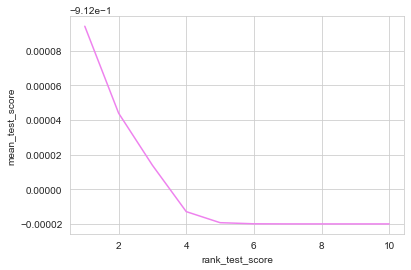

In [642]:
sns.lineplot(data= cv_result[retain_cols], y = 'mean_test_score', x = 'rank_test_score', color = 'violet')

In [643]:
# the best model
ridge_reg_gridcv.best_estimator_

Ridge(alpha=20, random_state=42)

In [644]:
# the coefficients of the best estimator (exclude intercept)
ridge_reg_gridcv.best_estimator_.coef_

array([0.0216851 , 0.06833912, 0.28735064, 0.07971477, 0.2478187 ,
       0.16496766, 0.06054181])

In [646]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + df4.drop(columns='Standardized_price').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,-334.274109
1,log_subscribers,0.021685
2,log_reviews,0.068339
3,log_lectures,0.287351
4,log_rating,0.079715
5,log_content,0.247819
6,year,0.164968
7,Encoded_subject,0.060542


- A 1 unit increase in `log_subscribers` is associated with an increase of 0.021685 total price (standardized form).
- A 1 unit increase in `log_reviews` is associated with an increase of 0.068339 total price (standardized form).
- A 1 unit increase in `log_lectures` is associated with an increase of 0.287351 total price (standardized form).
- A 1 unit increase in `log_rating` is associated with an increase of 0.079715 total price (standardized form).
- A 1 unit increase in `log_content` is associated with an increase of 0.247819 total price (standardized form).
- A 1 unit increase in `year` is associated with an increase of 0.164968 total price (standardized form).
- A 1 unit increase in `Encoded_subject` is associated with an increase of 0.060542 total price (standardized form).